In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Sources/final_dataset_firstclean.csv')

D:\TEMP\ipykernel_13364\850996326.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Sources/final_dataset_firstclean.csv')


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46216 entries, 0 to 46215
Columns: 117 entries, Location to loser_at_home
dtypes: float64(77), int64(13), object(27)
memory usage: 41.3+ MB


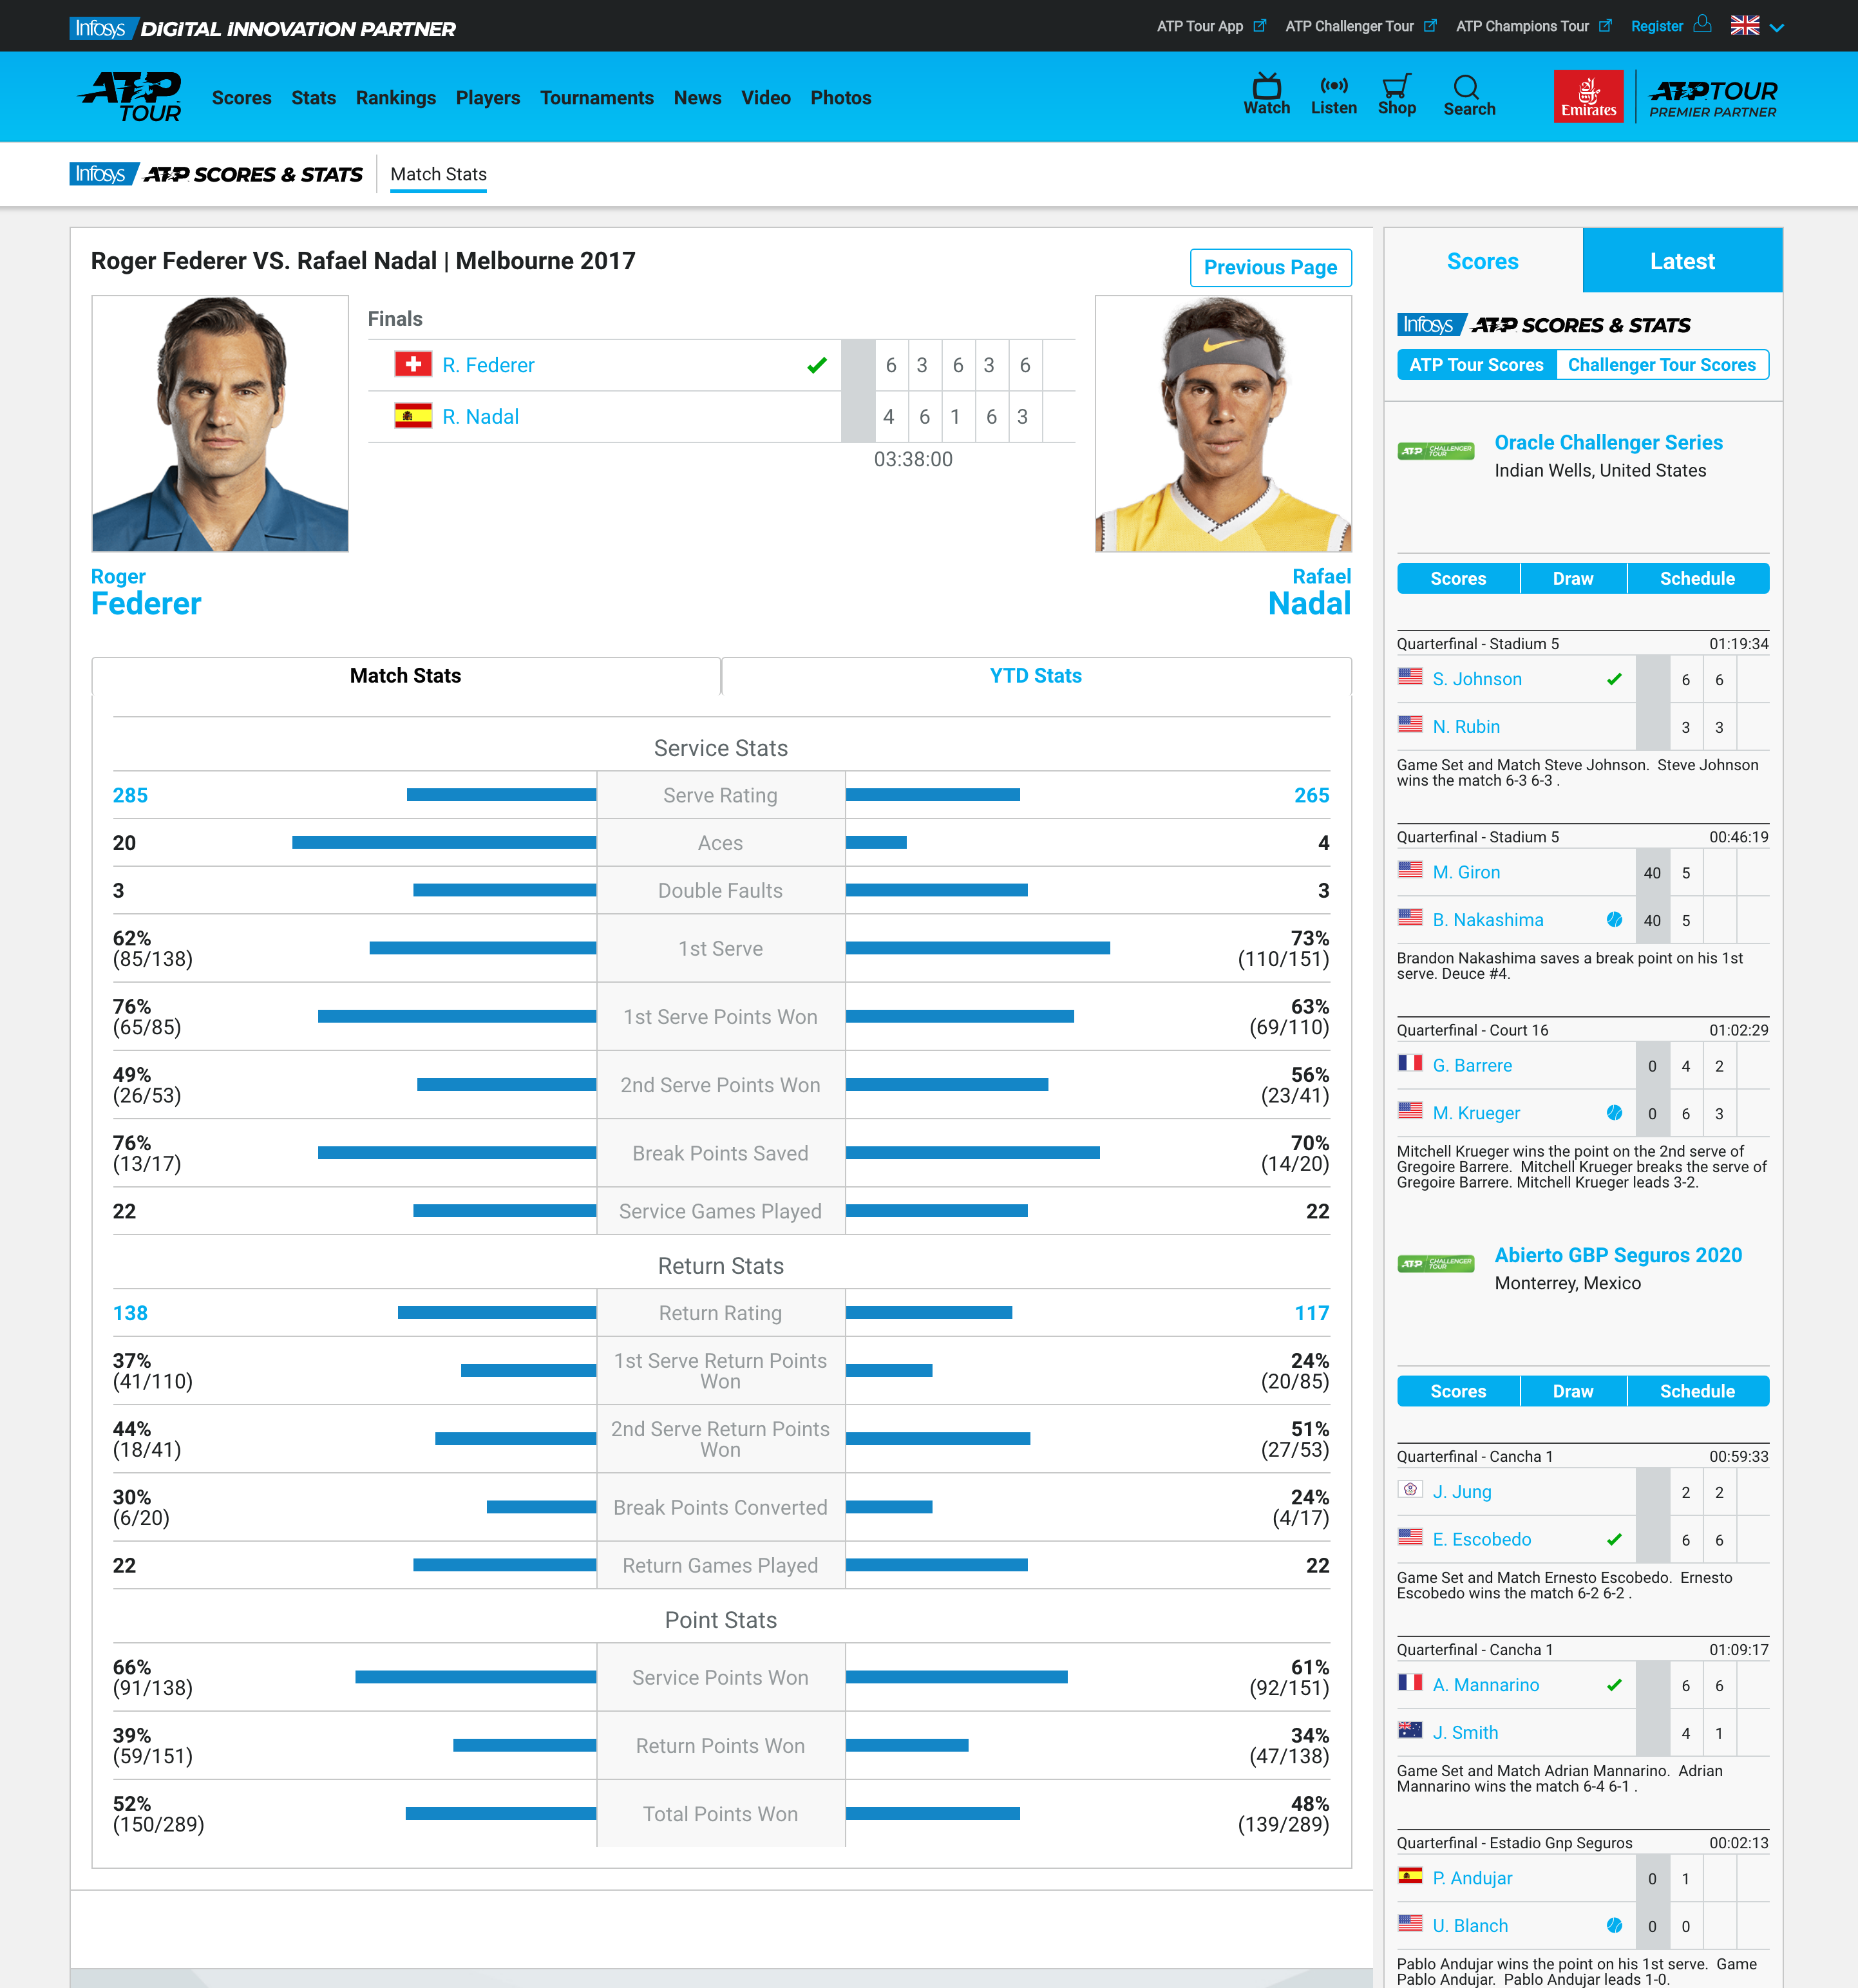

In [5]:
df['winner_points_won'] = df['winner_total_points_won']
df['loser_points_won'] = df['loser_total_points_won']

In [6]:
df['nb_sets'] = df['winner_sets_won'] + df['loser_sets_won']
df['nb_games'] = df['winner_games_won'] + df['loser_games_won']
df['nb_tiebreaks'] = df['winner_tiebreaks_won'] + df['loser_tiebreaks_won']
df['nb_points'] = df['winner_points_won'] + df['loser_points_won']

In [7]:
# transformation de certaines statistiques en pourcentage selon l'image ci-dessus 
# car dans le dataset nous avons les chiffres qui sont entre parenthèses en dessous des % dans l'image
# Winner
df['winner_first_serves_in'] = df['winner_first_serves_in']/df['winner_first_serves_total']
df['winner_first_serve_points_won'] = df['winner_first_serve_points_won']/df['winner_first_serve_points_total']
df['winner_second_serve_points_won'] = df['winner_second_serve_points_won']/df['winner_second_serve_points_total']
df['winner_break_points_saved'] = df['winner_break_points_saved']/df['winner_break_points_serve_total']
df['winner_first_serve_return_won'] = df['winner_first_serve_return_won']/df['winner_first_serve_return_total']
df['winner_second_serve_return_won'] = df['winner_second_serve_return_won']/df['winner_second_serve_return_total']
df['winner_break_points_converted'] = df['winner_break_points_converted']/df['winner_break_points_return_total']
df['winner_service_points_won'] = df['winner_service_points_won']/df['winner_service_points_total']
df['winner_return_points_won'] = df['winner_return_points_won']/df['winner_return_points_total']
df['winner_total_points_won'] = df['winner_total_points_won']/df['winner_total_points_total']
#Loser
df['loser_first_serves_in'] = df['loser_first_serves_in']/df['loser_first_serves_total']
df['loser_first_serve_points_won'] = df['loser_first_serve_points_won']/df['loser_first_serve_points_total']
df['loser_second_serve_points_won'] = df['loser_second_serve_points_won']/df['loser_second_serve_points_total']
df['loser_break_points_saved'] = df['loser_break_points_saved']/df['loser_break_points_serve_total']
df['loser_first_serve_return_won'] = df['loser_first_serve_return_won']/df['loser_first_serve_return_total']
df['loser_second_serve_return_won'] = df['loser_second_serve_return_won']/df['loser_second_serve_return_total']
df['loser_break_points_converted'] = df['loser_break_points_converted']/df['loser_break_points_return_total']
df['loser_service_points_won'] = df['loser_service_points_won']/df['loser_service_points_total']
df['loser_return_points_won'] = df['loser_return_points_won']/df['loser_return_points_total']
df['loser_total_points_won'] = df['loser_total_points_won']/df['loser_total_points_total']

In [8]:
# colonnes à supprimer suite à la transformation
col_to_drop = ['winner_total_points_total', 'loser_total_points_total']

In [9]:
df = df.drop(col_to_drop, axis=1)

In [10]:
# nettoyage complémentaire

In [11]:
# suppression EXW et EXL
df = df.drop(['EXW', 'EXL'], axis=1)

In [12]:
# doublons sur le nb sets (Wsets et Lsets = winner_sets_won et loser_sets_won)
# suppression de Wsets et Lsets
df = df.drop(['Wsets', 'Lsets'], axis=1)

In [13]:
# suppression id winner et loser (on garde winner_name et loser_name comme id)
df = df.drop(['winner_player_id', 'loser_player_id'], axis=1)

In [14]:
# suppression des données liées à la location et nationalités des joueurs
# puisque nous savons désormais si les joueurs sont à domiciles ou pas
col_to_drop_2 = ['Location', 'winner_flag_code', 'loser_flag_code', 'winner_birthplace', 
                 'loser_birthplace', 'Location_flag_code']

In [15]:
df = df.drop(col_to_drop_2, axis=1)

In [16]:
# suppression des colonnes W1 à L5 car redondance avec winner/loser_sets_won/_games_won
df = df.drop(['W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5'], axis=1)

In [17]:
# suppression de start_date (date de début du tournoi) et end_date (date de fin du tournoi)
# nous gardons la date du match (Date)
df = df.drop(['start_date', 'end_date'], axis=1)

In [18]:
#(pd.to_datetime(df['Date']) - pd.to_datetime(df['winner_birthdate'])).astype('str').apply(lambda x: x.split()[0])

In [19]:
# transformation de la colonne birthdate en age
df['winner_age'] = (pd.to_datetime(df['Date']) - pd.to_datetime(df['winner_birthdate'])).apply(lambda x: x.days/365)
df['loser_age'] = (pd.to_datetime(df['Date']) - pd.to_datetime(df['loser_birthdate'])).apply(lambda x: x.days/365)

In [20]:
# suppression colonne birthdate
df = df.drop(['winner_birthdate', 'loser_birthdate'], axis=1)

In [21]:
# Tri par Date
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df = df.sort_values(by='Date').reset_index(drop=True)

In [23]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [24]:
# transformation de winner/loser_turned_pro en nb_year_xp
df['winner_nb_year_xp'] = df['year'] - df['winner_turned_pro']
df['loser_nb_year_xp'] = df['year'] - df['loser_turned_pro']

In [25]:
df = df.drop(['winner_turned_pro', 'loser_turned_pro'], axis=1)

In [26]:
df['winner_handedness'].fillna(df['winner_handedness'].mode()[0], inplace=True)
df['loser_handedness'].fillna(df['loser_handedness'].mode()[0], inplace=True)
df['winner_backhand'].fillna(df['winner_backhand'].mode()[0], inplace=True)
df['loser_backhand'].fillna(df['loser_backhand'].mode()[0], inplace=True)

In [27]:
df = df.drop(['WPts','LPts'], axis=1)

In [28]:
# harmonisation des devises vers une seule -> EUR
# AUD/EUR = 0.65
# GBP/EUR = 1.15
# USD/EUR = 0.85

def conversion_euro(devise):
    if devise == 'USD':
        return 0.85
    elif devise == 'AUD':
        return 0.65
    elif devise == 'GBP':
        return 1.15
    else:
        return 1

df['taux_conv'] = df['currency_y'].apply(lambda x: conversion_euro(x))
df['prize_money_euro'] = df['taux_conv']*df['tourney_fin_commit']

In [29]:
df = df.drop(['currency_y', 'tourney_fin_commit', 'taux_conv'], axis=1)

In [30]:
df = df[df['Comment'] == 'Completed']

In [31]:
df = df.drop('Comment', axis=1)

In [32]:
df.reset_index(drop=True, inplace=True)

In [33]:
df = df[(df['year'] <= 2019)]

In [34]:
df['B365W'].fillna(0, inplace=True)
df['B365L'].fillna(0, inplace=True)
df['PSW'].fillna(0, inplace=True)
df['PSL'].fillna(0, inplace=True)

In [35]:
df.dropna(inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33545 entries, 0 to 39279
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Tournament                        33545 non-null  object        
 1   Date                              33545 non-null  datetime64[ns]
 2   Series                            33545 non-null  object        
 3   Court                             33545 non-null  object        
 4   Surface                           33545 non-null  object        
 5   Round                             33545 non-null  object        
 6   Best of                           33545 non-null  int64         
 7   WRank                             33545 non-null  int64         
 8   LRank                             33545 non-null  int64         
 9   B365W                             33545 non-null  float64       
 10  B365L                             33545 non-nu

In [37]:
df.to_csv('Sources/final_dataset_secondclean.csv', index=False)

In [38]:
list(df.columns)

['Tournament',
 'Date',
 'Series',
 'Court',
 'Surface',
 'Round',
 'Best of',
 'WRank',
 'LRank',
 'B365W',
 'B365L',
 'PSW',
 'PSL',
 'winner_name',
 'loser_name',
 'winner_sets_won',
 'loser_sets_won',
 'winner_games_won',
 'loser_games_won',
 'winner_tiebreaks_won',
 'loser_tiebreaks_won',
 'match_duration',
 'winner_serve_rating',
 'winner_aces',
 'winner_double_faults',
 'winner_first_serves_in',
 'winner_first_serves_total',
 'winner_first_serve_points_won',
 'winner_first_serve_points_total',
 'winner_second_serve_points_won',
 'winner_second_serve_points_total',
 'winner_break_points_saved',
 'winner_break_points_serve_total',
 'winner_service_games_played',
 'winner_return_rating',
 'winner_first_serve_return_won',
 'winner_first_serve_return_total',
 'winner_second_serve_return_won',
 'winner_second_serve_return_total',
 'winner_break_points_converted',
 'winner_break_points_return_total',
 'winner_return_games_played',
 'winner_service_points_won',
 'winner_service_points_t